#    PROIECT SEMESTRU IC1

## by GIRLA Ionut 411-SIVA
### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import cv2
import copy
import pandas as pd
import ipyplot
import random
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Definire variabile globale necesare in executie

In [2]:
DATADIR = "E:/SIVA-Master/AN_1/Sem_1/IC1/proiect_semestru/dataset/jaffedbase"
CATEGORIES = []

train_ratio = 0.85
test_ratio = 0.15


Preluare categorii din fisierul text

In [3]:
labels = open("labels.txt")
for img in os.listdir(DATADIR):
    print(img)
    new_string = img.split(sep=".")[0] + "-" + img.split(sep=".")[1]
    print(new_string)
    break
    
with open("labels.txt") as f:
    first_line = f.readline()
    print(first_line)
    CATEGORIES = first_line.split(sep=" ")[1:-1]
    print(CATEGORIES)

KA.AN1.39.tiff
KA-AN1
# HAP SAD SUR ANG DIS PIC

['HAP', 'SAD', 'SUR', 'ANG', 'DIS']


Import poze si construirea setului de date de forma imagine - eticheta

In [4]:
def import_dataset():
    contor = 0
    for img in os.listdir(DATADIR):
            try:
                #print(f"suntem la pasul {contor}")
                new_string = img.split(sep=".")[0] + "-" + img.split(sep=".")[1]
                img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)
                labels = open("labels.txt")
                for line in labels:
                    #print(f"line = {line}")
                    if new_string in line:
                        #print(f"new_string = {new_string}; with line = {line}")
                        result = line.split(sep=" ")[1:-1] 
                        max_val = result[0]
                        index = 0
                        #print(len(result))
                        for i in range (1,len(result)):
                            #print(f"i = {i} ; result[i] = {result[i]}; max_val = {max_val}; index = {index}")
                            if max_val < result[i]:
                                index = i
                                max_val = result[i]
                #print(index)
                labels.close()
                dataset.append([img_array, index])
                contor = contor + 1
            except Exception as e:
                pass
dataset = [] 
import_dataset()
print(np.shape(dataset))
print(np.shape(dataset[0][0]))
print(dataset[0][1])
print(CATEGORIES)

(213, 2)
(256, 256)
3
['HAP', 'SAD', 'SUR', 'ANG', 'DIS']


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Impartirea in Matrice de caracteristici si vector de valori dependente

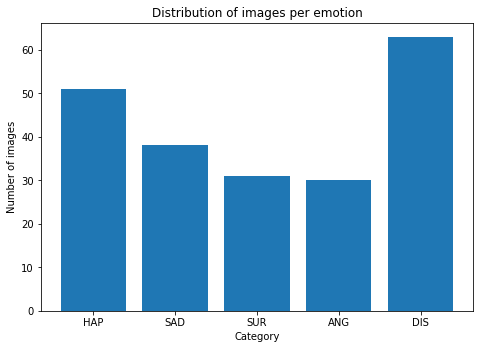

In [5]:
fig = plt.figure()
histograma = [0,0,0,0,0]
for img, clasa in dataset:
    histograma[clasa] += 1
ax = fig.add_axes([0,0,1,1])
ax.bar(CATEGORIES,histograma)
plt.ylabel('Number of images')
plt.xlabel('Category')
plt.title('Distribution of images per emotion')
plt.show()

In [6]:
X = []
y = []
for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

x_train = np.reshape(x_train,(len(x_train),256*256))
x_test = np.reshape(x_test,((len(X)-len(x_train)),256*256))
print(f" size of x_train: {len(x_train)}, size of x_test: {len(x_test)}")

print(f" size of x_train: {np.shape(x_train)}, size of x_test: {np.shape(x_test)}")


 size of x_train: 181, size of x_test: 32
 size of x_train: (181, 65536), size of x_test: (32, 65536)


In [6]:
MinMaxScaler().fit_transform(x_train)
MinMaxScaler().fit_transform(x_test)

array([[0.56296296, 0.62878788, 0.54545455, ..., 0.31578947, 0.26086957,
        0.31914894],
       [0.51851852, 0.58333333, 0.60606061, ..., 0.29323308, 0.30434783,
        0.25531915],
       [0.48148148, 0.56818182, 0.65151515, ..., 0.38345865, 0.39855072,
        0.40425532],
       ...,
       [0.51851852, 0.62121212, 0.48484848, ..., 0.43609023, 0.52173913,
        0.46808511],
       [0.8       , 0.83333333, 0.88636364, ..., 0.62406015, 0.61594203,
        0.58865248],
       [0.55555556, 0.59090909, 0.59090909, ..., 0.02255639, 0.02173913,
        0.06382979]])

Aplicare clasificator SVM 

In [24]:

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(data_train, y_train)
#y_predicted_svm = clf.predict(data_test)
clf = svm.SVC()
clf.fit(x_train,y_train)
y_predicted_svm = clf.predict(x_test)


cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted_svm)
print(cm)



[[5 0 0 4 6]
 [0 1 0 1 1]
 [0 0 3 0 2]
 [0 0 0 1 0]
 [0 0 1 0 7]]


Calcul precizie

In [25]:
contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted_svm[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

precizie = 0.53125


Aplicare PCA asupra datelor pastrand cele mai semnificative 50 de componente (din 65536 initiale)

In [9]:

pca = PCA(n_components = 50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_


In [7]:
print(explained_variance)

NameError: name 'explained_variance' is not defined

Aplicare clasificator dupa reducerea dimensiunilor

In [8]:

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(data_train, y_train)
#y_predicted_svm = clf.predict(data_test)
clf_after_pca = svm.SVC()
clf_after_pca.fit(x_train,y_train)
y_predicted_svm = clf_after_pca.predict(x_test)


cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted_svm)
print(cm)

[[3 0 0 1 2]
 [4 1 0 1 1]
 [1 0 3 0 2]
 [0 0 0 3 0]
 [2 0 1 1 6]]


Calculare precizie dupa PCA

In [9]:
contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted_svm[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

precizie = 0.5


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Grid Search pentru determinarea parametrilor optimi


Variem numarul componentelor cat si metoda de scalare a datelor folosita:

4
(4, 3)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


       Scaler  NumberOfComponents  Accuracy
5  No scaling                  35    84.375


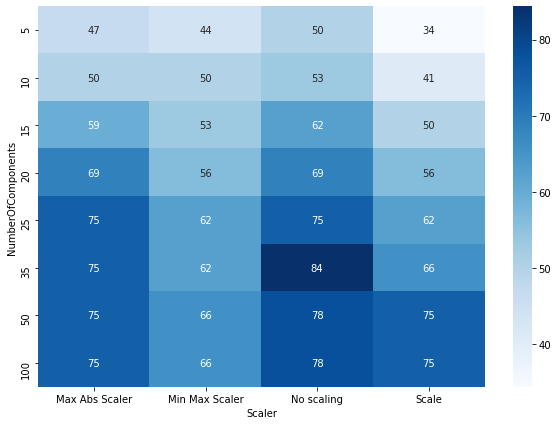

In [26]:
acc_list = []
scaling = [
    ('No scaling', x_train, x_test),
    ('Scale', preprocessing.scale(x_train), preprocessing.scale(x_test)),
    ('Min Max Scaler', MinMaxScaler().fit_transform(x_train), MinMaxScaler().fit_transform(x_test)),
    ('Max Abs Scaler', MaxAbsScaler().fit_transform(x_train), MaxAbsScaler().fit_transform(x_test))
]

print(len(scaling))
print(np.shape(scaling))

pca_values = [5, 10, 15, 20, 25, 35, 50, 100]

for name, train, test in scaling:
    for number_of_components in pca_values:
        train_local = copy.copy(train)
        test_local = copy.copy(test)
        pca = PCA(n_components = number_of_components)
        x_train_curent = pca.fit_transform(train_local)
        x_test_curent = pca.transform(test_local)    
        clf = svm.SVC()
        clf.fit(x_train_curent,y_train)
        y_predicted = clf.predict(x_test_curent)
        acc_list.append([name, number_of_components, accuracy_score(y_predicted, y_test)*100])
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['Scaler'])

plt.figure(figsize=(10,7))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

In [42]:
train_local = copy.copy(x_train)
test_local = copy.copy(x_test)
pca = PCA(n_components = 35)
x_train_curent = pca.fit_transform(train_local)
x_test_curent = pca.transform(test_local)  
clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)
print(cm)
        


contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

[[12  0  0  3  0]
 [ 0  2  0  1  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  0]
 [ 0  0  1  0  7]]
precizie = 0.84375


In [43]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [44]:
clf.score(x_test_curent,y_test)

0.84375

In [45]:
with open('train.pickle', 'wb') as f:
    pickle.dump([x_train_curent, y_train], f)

In [46]:
with open('test.pickle', 'wb') as f:
    pickle.dump([x_test_curent, y_test], f)

In [12]:
with open('train.pickle', 'rb') as f:
    x_train_pickle, y_train_pickle = pickle.load(f)
    
with open('test.pickle', 'rb') as f:
    x_test_pickle, y_test_pickle = pickle.load(f)

clf = svm.SVC()
clf.fit(x_train_pickle,y_train_pickle)
y_predicted = clf.predict(x_test_pickle)

cm = confusion_matrix(y_true = y_test_pickle[:] ,y_pred = y_predicted)
print(cm)
        

clf.score(x_train_pickle,y_train_pickle)
print(classification_report(y_test_pickle, y_predicted, target_names=CATEGORIES, digits=4))

[[12  0  0  3  0]
 [ 0  2  0  1  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  0]
 [ 0  0  1  0  7]]
0.712707182320442
              precision    recall  f1-score   support

         HAP     1.0000    0.8000    0.8889        15
         SAD     1.0000    0.6667    0.8000         3
         SUR     0.8333    1.0000    0.9091         5
         ANG     0.2000    1.0000    0.3333         1
         DIS     1.0000    0.8750    0.9333         8

    accuracy                         0.8438        32
   macro avg     0.8067    0.8683    0.7729        32
weighted avg     0.9490    0.8438    0.8775        32



In [48]:
with open('finalized_model.sav', 'rb') as f:
    clf = pickle.load(f)
   
with open('test.pickle', 'rb') as f:
    x_test_pickle, y_test_pickle = pickle.load(f)   
    
    
clf.score(x_test_pickle,y_test_pickle)

0.84375

# Revenire asupra modelului pentru clasificare in 7 clase

Definire variabile

In [2]:
DATADIR = "E:/SIVA-Master/AN_1/Sem_1/IC1/proiect_semestru/dataset/jaffedbase"
CATEGORIES = ["AN", "DI", "FE", "HA", "NE", "SA", "SU"]
train_ratio = 0.8
test_ratio = 0.2

Importare si preprocesare date

In [3]:
def import_dataset():
    for img in os.listdir(DATADIR):
            try:
                new_string = img.split(sep=".")[0] + "-" + img.split(sep=".")[1] 
                current_category = "".join([x for x in new_string.split(sep="-")[1] if x not in ['0','1','2','3','4','5','6','7','8','9']])
                class_idex = CATEGORIES.index(current_category) #determinare clasa din care face parte imaginea curenta
                
                img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE) #citire imagine
                
                img_array = img_array[48:216, 66:186] #decupare imagine
                
                img_array = cv2.equalizeHist(img_array) #aplicarea Histogramei de egalizare
                img_array = img_array.flatten() #transformare imagine curenta in vector
                
                dataset.append([img_array, class_idex]) #stocare imagine curenta in lista
            except Exception as e:
                print(e)
dataset = [] 
import_dataset()

print(f" Dimensiunea setului de date este: {np.shape(dataset)}")
print(f" Dimensiunea unei inregistrari din setul de date este: {np.shape(dataset[0][0])}")


 Dimensiunea setului de date este: (213, 2)
 Dimensiunea unei inregistrari din setul de date este: (20160,)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Definire functii de afisare a histogramei imaginilor pe clase

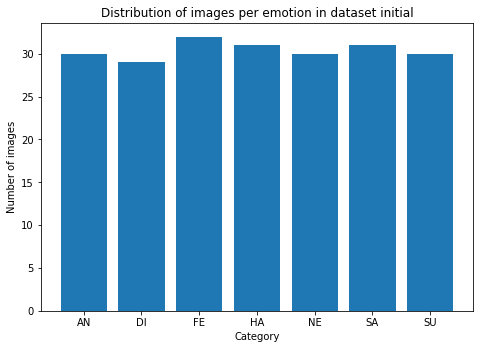

In [4]:
def plot_hist_for_dataset(data, message):
    fig = plt.figure()
    histograma = [0,0,0,0,0,0,0]
    for img, clasa in data:
        histograma[clasa] += 1
    ax = fig.add_axes([0,0,1,1])
    ax.bar(CATEGORIES,histograma)
    plt.ylabel('Number of images')
    plt.xlabel('Category')
    plt.title(f"Distribution of images per emotion in {message}")
    plt.show()

def plot_hist_for_y(y_train,y_test): 
    y= [y_train,y_test]
    for i in range(1,3):
        fig = plt.figure()
        histograma = [0,0,0,0,0,0,0]
        for clasa in y[i-1]:
            histograma[clasa] += 1
        ax = fig.add_axes([0,0,1,1])
        ax.bar(CATEGORIES,histograma)
        plt.ylabel('Number of images')
        plt.xlabel('Category')
        plt.title(f"Distribution of images per emotion")
    plt.show()
    
plot_hist_for_dataset(dataset, "dataset initial")

Impartire date de test, date de antrenare

 len of x_train: 170, len of x_test: 43
 shape of x_train: (170, 20160), shape of x_test: (43, 20160)


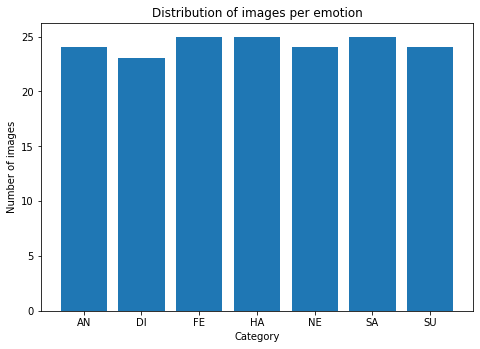

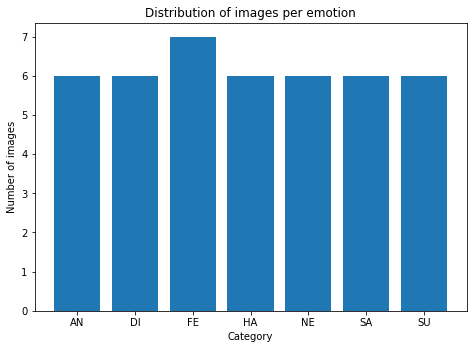

In [27]:
X = []
y = []
for features, label in dataset:
    X.append(features)
    y.append(label)
    
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio,random_state=0, stratify=y)

print(f" len of x_train: {len(x_train)}, len of x_test: {len(x_test)}")
print(f" shape of x_train: {np.shape(x_train)}, shape of x_test: {np.shape(x_test)}")

plot_hist_for_y(y_train, y_test)



Clasificare fara pca

Dimensiunile x_train: (170, 20160), Dimensiunile x_test: (43, 20160) 

Acuratete clasificare fara PCA: 67.44186046511628
              precision    recall  f1-score   support

          AN     0.7143    0.8333    0.7692         6
          DI     1.0000    0.3333    0.5000         6
          FE     0.5000    0.2857    0.3636         7
          HA     0.8000    0.6667    0.7273         6
          NE     0.6250    0.8333    0.7143         6
          SA     0.5000    0.8333    0.6250         6
          SU     0.8571    1.0000    0.9231         6

    accuracy                         0.6744        43
   macro avg     0.7138    0.6837    0.6604        43
weighted avg     0.7088    0.6744    0.6535        43



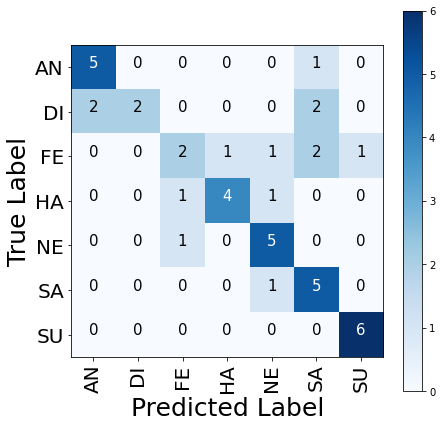

In [20]:
x_train_curent = copy.copy(x_train)
x_test_curent = copy.copy(x_test) 

clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)
print(f"Dimensiunile x_train: {np.shape(x_train)}, Dimensiunile x_test: {np.shape(x_test)} \n")

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)
print(f"Acuratete clasificare fara PCA: {accuracy_score(y_predicted, y_test)*100}")

print(classification_report(y_test, y_predicted, target_names=CATEGORIES, digits=4))

fig = plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(7)
plt.xticks(tick_marks, CATEGORIES, fontsize=20,rotation=90)
plt.yticks(tick_marks, CATEGORIES, fontsize=20)
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 2:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.gcf().canvas.draw()

Cautare pentru optimizare numar componente PCA

             Scaler  NumberOfComponents  Accuracy
67  Standard Scaler                 170     100.0


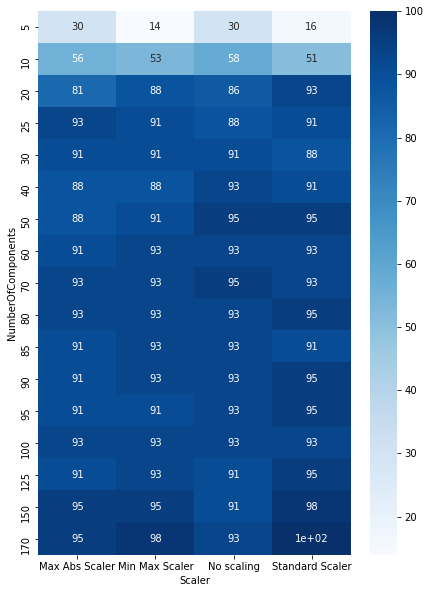

In [6]:
acc_list = []
st_sc = StandardScaler()
mM_sc = MinMaxScaler()
Ma_sc = MaxAbsScaler()
scaling = [
    ('No scaling', x_train, x_test),
    ('Min Max Scaler', mM_sc.fit_transform(x_train), mM_sc.transform(x_test)),
    ('Max Abs Scaler', Ma_sc.fit_transform(x_train), Ma_sc.transform(x_test)),
    ('Standard Scaler', st_sc.fit_transform(x_train),st_sc.transform(x_test))
]

pca_values = [5, 10, 20, 25, 30, 40, 50, 60,70, 80, 85, 90, 95, 100,125,150, 170]

for name, train, test in scaling:
    for number_of_components in pca_values:
        
        train_local = copy.copy(train)
        test_local = copy.copy(test)
        
        pca = PCA(n_components = number_of_components)
        x_train_curent = pca.fit_transform(train_local)
        x_test_curent = pca.transform(test_local)  
        
        clf = svm.SVC(C=1, kernel='linear')
        clf.fit(x_train_curent,y_train)
        y_predicted = clf.predict(x_test_curent)
        
        acc_list.append([name, number_of_components, accuracy_score(y_predicted, y_test)*100])
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['Scaler'])

plt.figure(figsize=(7,10))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

Verificare caz de acuratete maxima

In [28]:
st_sc = StandardScaler()

x_train = st_sc.fit_transform(x_train)
x_test = st_sc.transform(x_test)

x_train_curent = copy.copy(x_train)
x_test_curent = copy.copy(x_test)
pca = PCA(n_components = 170)
x_train_curent = pca.fit_transform(train_local)
x_test_curent = pca.transform(test_local)  
clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)

print(f"Dimensiunile x_train: {np.shape(x_train_curent)}, Dimensiunile x_test: {np.shape(x_test_curent)} \n")

print(f"Acuratete folosind PCA: {accuracy_score(y_predicted, y_test)*100} \n")


#print(f"Informatie pastrata dupa PCA: {sum(pca.explained_variance_ratio_)}\n")
print(classification_report(y_test, y_predicted, target_names=CATEGORIES, digits=4))

Dimensiunile x_train: (170, 20160), Dimensiunile x_test: (43, 20160) 

Acuratete folosind PCA: 100.0 

              precision    recall  f1-score   support

          AN     1.0000    1.0000    1.0000         6
          DI     1.0000    1.0000    1.0000         6
          FE     1.0000    1.0000    1.0000         7
          HA     1.0000    1.0000    1.0000         6
          NE     1.0000    1.0000    1.0000         6
          SA     1.0000    1.0000    1.0000         6
          SU     1.0000    1.0000    1.0000         6

    accuracy                         1.0000        43
   macro avg     1.0000    1.0000    1.0000        43
weighted avg     1.0000    1.0000    1.0000        43



Afisare matrice de confuzie

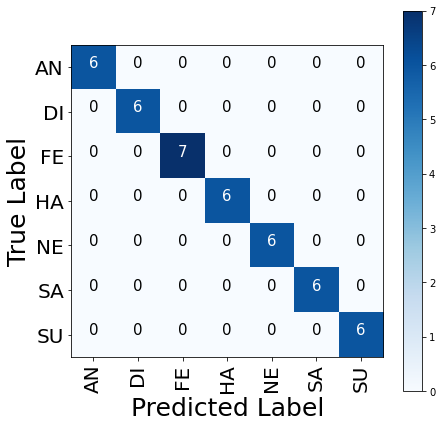

In [29]:

fig = plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(7)
plt.xticks(tick_marks, CATEGORIES, fontsize=20,rotation=90)
plt.yticks(tick_marks, CATEGORIES, fontsize=20)
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 2:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.gcf().canvas.draw()

Versiune cu multi pasi de incercare de optimizare dupa raportul de date de test/ date totale

In [ ]:
acc_list = []

pca_values = [5, 10, 15, 20, 25,40, 50, 75, 90, 95, 100]
test_ratio_values = [0.1, 0.2, 0.3, 0.4, 0.5]
for test_ratio in test_ratio_values:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, stratify=y, random_state=4)
    print(f" results obtained for test_ratio = {test_ratio}")
    plot_hist_for_y(y_train, y_test)
    st_sc = StandardScaler()
    mM_sc = MinMaxScaler()
    Ma_sc = MaxAbsScaler()
    scaling = [
    ('No scaling', x_train, x_test),
    ('Min Max Scaler', mM_sc.fit_transform(x_train), mM_sc.transform(x_test)),
    ('Max Abs Scaler', Ma_sc.fit_transform(x_train), Ma_sc.transform(x_test)),
    ('Standard Scaler', st_sc.fit_transform(x_train),st_sc.transform(x_test))
    ]
    for name, train, test in scaling:
        for number_of_components in pca_values:
            train_local = copy.copy(train)
            test_local = copy.copy(test)
            pca = PCA(n_components = number_of_components)
            x_train_curent = pca.fit_transform(train_local)
            x_test_curent = pca.transform(test_local)    
            clf = svm.SVC()
            clf.fit(x_train_curent,y_train)
            y_predicted = clf.predict(x_test_curent)
            acc_list.append([name, number_of_components,test_ratio, accuracy_score(y_predicted, y_test)*100])
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents','TestRatio', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['TestRatio','Scaler'])

plt.figure(figsize=(20,20))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

Afisare rezultate pentru raportul optim de date de test / date de antrenare

[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 2 0 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

          AN     1.0000    1.0000    1.0000         3
          DI     1.0000    1.0000    1.0000         3
          FE     1.0000    1.0000    1.0000         4
          HA     1.0000    0.6667    0.8000         3
          NE     0.6667    0.6667    0.6667         3
          SA     0.5000    0.6667    0.5714         3
          SU     1.0000    1.0000    1.0000         3

    accuracy                         0.8636        22
   macro avg     0.8810    0.8571    0.8626        22
weighted avg     0.8864    0.8636    0.8688        22



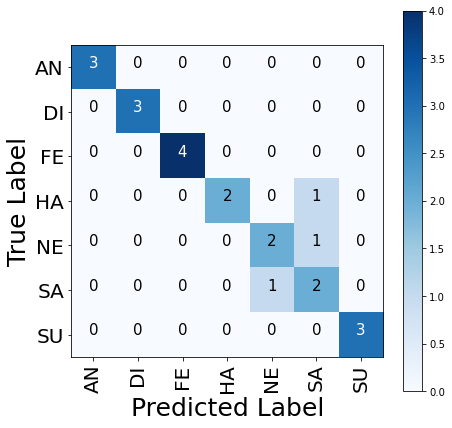

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=4)
pca = PCA(n_components = 75)
x_train_curent = pca.fit_transform(x_train)
x_test_curent = pca.transform(x_test)  
clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)
print(cm)
        
accuracy_score(y_predicted, y_test)*100

print(classification_report(y_test, y_predicted, target_names=CATEGORIES, digits=4))

fig = plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(7)
plt.xticks(tick_marks, CATEGORIES, fontsize=20,rotation=90)
plt.yticks(tick_marks, CATEGORIES, fontsize=20)
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 2:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.gcf().canvas.draw()

Determinare cel mai bun kernel

In [24]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=4)
pca = PCA(n_components = 75)
x_train_curent = pca.fit_transform(x_train)
x_test_curent = pca.transform(x_test)  

parameters = {'kernel':('rbf','linear'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train_curent, y_train)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

y_predicted = clf.predict(x_test_curent)
clf.best_estimator_

SVC(C=1, kernel='linear')

Versiune cu mai putini pasi de incercare de optimizare dupa raportul de date de test/ date totale

 results obtained for test_ratio = 0.05


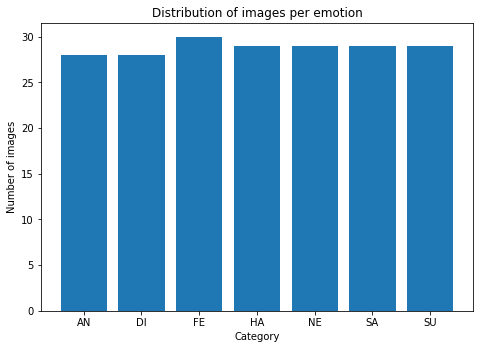

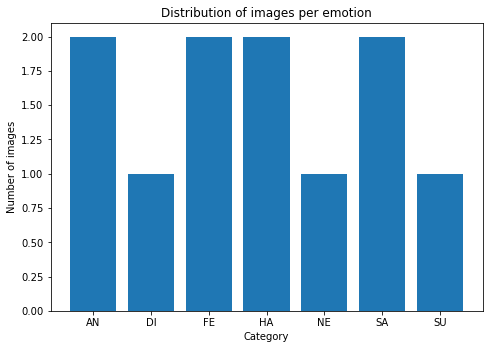

 results obtained for test_ratio = 0.1


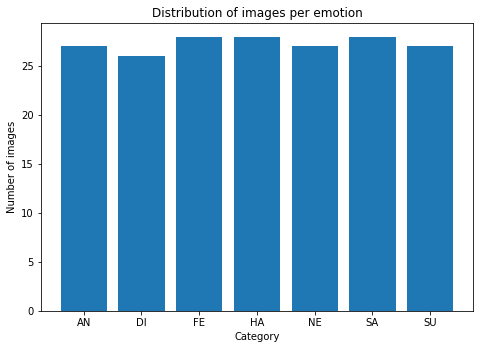

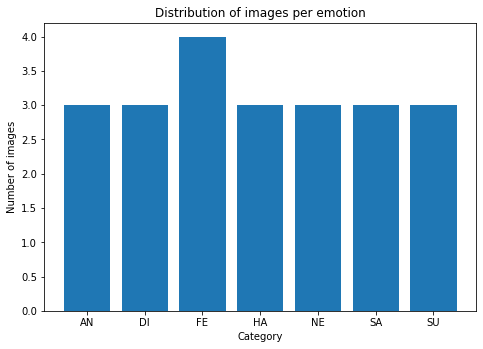

 results obtained for test_ratio = 0.15


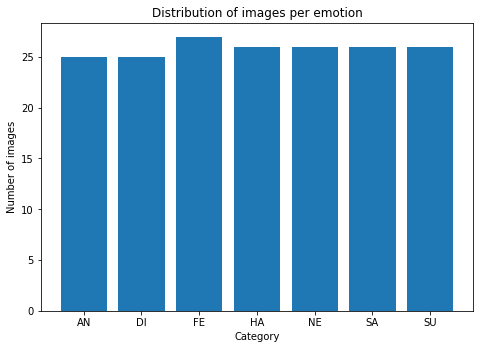

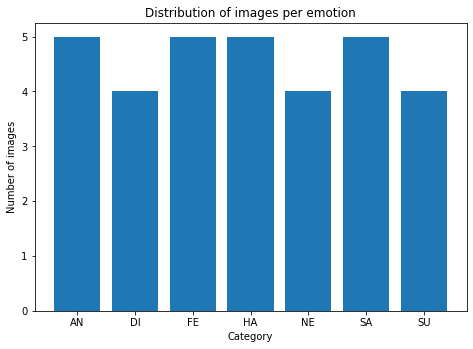

 results obtained for test_ratio = 0.2


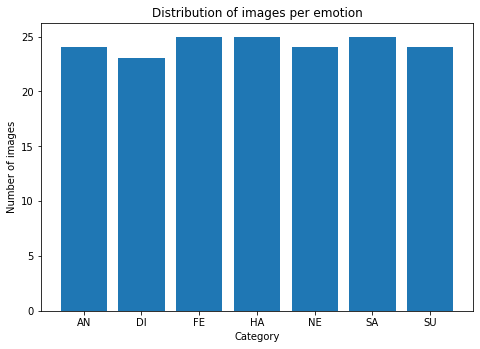

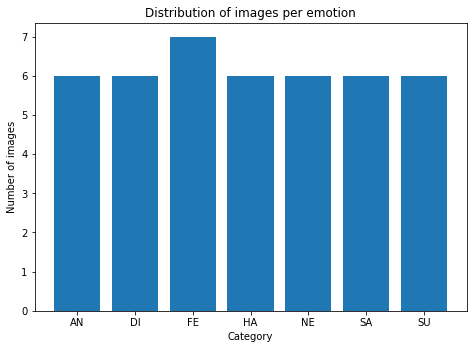

 results obtained for test_ratio = 0.3


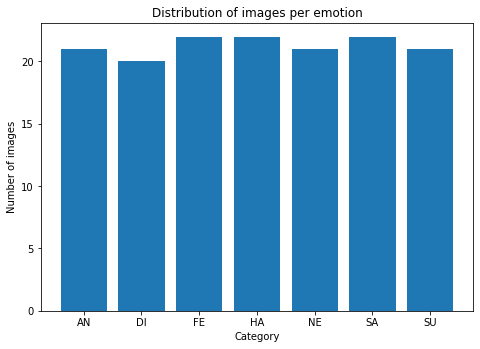

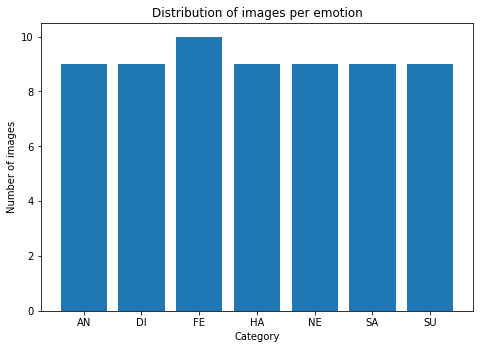

 results obtained for test_ratio = 0.4


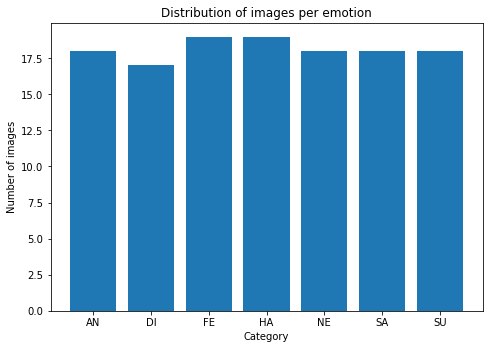

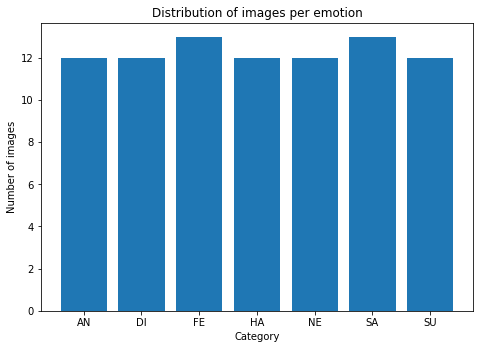

 results obtained for test_ratio = 0.5


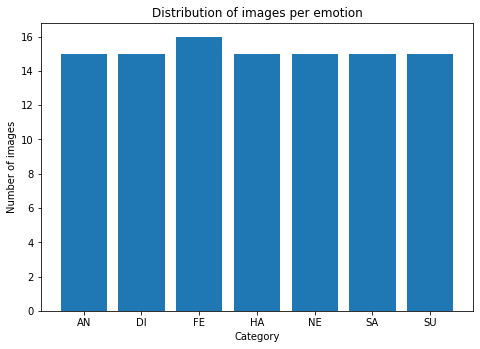

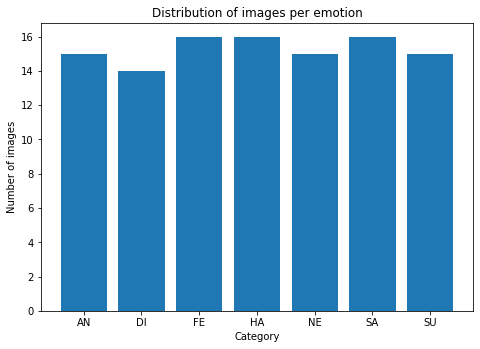

       Scaler  NumberOfComponents  TestRatio  Accuracy
0  No scaling                  30       0.05     100.0
1  No scaling                  40       0.05     100.0
2  No scaling                  50       0.05     100.0
4  No scaling                  80       0.05     100.0
5  No scaling                  85       0.05     100.0
6  No scaling                  90       0.05     100.0
7  No scaling                  95       0.05     100.0
8  No scaling                 100       0.05     100.0
9  No scaling                 105       0.05     100.0


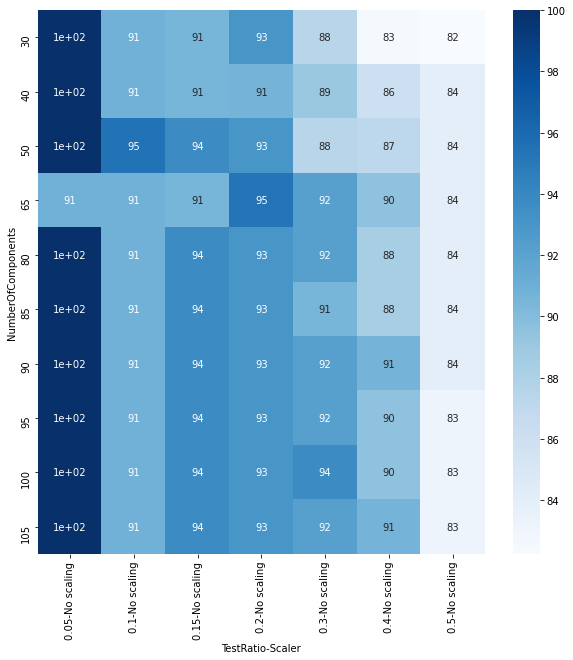

In [39]:
acc_list = []


pca_values = [30, 40, 50,65,80, 85, 90, 95, 100,105]
test_ratio_values = [0.05, 0.1,0.15, 0.2, 0.3, 0.4, 0.5]
for test_ratio in test_ratio_values:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state=0, stratify=y)
    print(f" results obtained for test_ratio = {test_ratio}")
    plot_hist_for_y(y_train, y_test)
    st_sc = StandardScaler()
    mM_sc = MinMaxScaler()
    Ma_sc = MaxAbsScaler()
    scaling = [
    ('No scaling', x_train, x_test),
    ]
    for name, train, test in scaling:
        for number_of_components in pca_values:
                train_local = copy.copy(train)
                test_local = copy.copy(test)
                pca = PCA(n_components = number_of_components)
                x_train_curent = pca.fit_transform(train_local)
                x_test_curent = pca.transform(test_local)    
                clf = svm.SVC(C=1, kernel='linear')
                clf.fit(x_train_curent,y_train)
                y_predicted = clf.predict(x_test_curent)
                acc_list.append([name, number_of_components,test_ratio, accuracy_score(y_predicted, y_test)*100])
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents','TestRatio', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['TestRatio','Scaler'])

plt.figure(figsize=(10,10))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

Afisare rezultat optim din punct de vedere al raportului date test/date antrenare

Dimensiunile x_train: (202, 30), Dimensiunile x_test: (11, 30) 

Acuratete folosind PCA: 90.9090909090909 

Informatie pastrata dupa PCA: 0.8148674023802739

              precision    recall  f1-score   support

          AN     1.0000    1.0000    1.0000         2
          DI     1.0000    1.0000    1.0000         1
          FE     1.0000    1.0000    1.0000         2
          HA     1.0000    0.5000    0.6667         2
          NE     0.5000    1.0000    0.6667         1
          SA     1.0000    1.0000    1.0000         2
          SU     1.0000    1.0000    1.0000         1

    accuracy                         0.9091        11
   macro avg     0.9286    0.9286    0.9048        11
weighted avg     0.9545    0.9091    0.9091        11



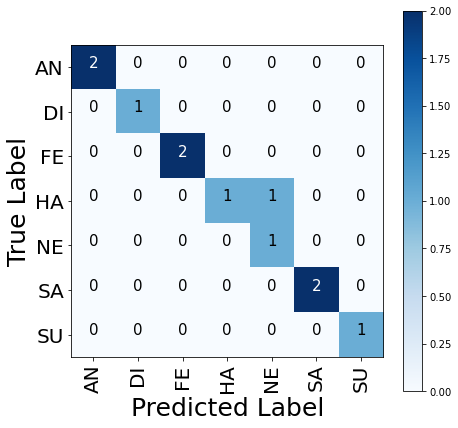

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=0, stratify=y)
train_local = copy.copy(x_train)
test_local = copy.copy(x_test)
pca = PCA(n_components = 30)
x_train_curent = pca.fit_transform(train_local)
x_test_curent = pca.transform(test_local)  
clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)

print(f"Dimensiunile x_train: {np.shape(x_train_curent)}, Dimensiunile x_test: {np.shape(x_test_curent)} \n")

print(f"Acuratete folosind PCA: {accuracy_score(y_predicted, y_test)*100} \n")


print(f"Informatie pastrata dupa PCA: {sum(pca.explained_variance_ratio_)}\n")
print(classification_report(y_test, y_predicted, target_names=CATEGORIES, digits=4))
fig = plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(7)
plt.xticks(tick_marks, CATEGORIES, fontsize=20,rotation=90)
plt.yticks(tick_marks, CATEGORIES, fontsize=20)
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 1:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.gcf().canvas.draw()